# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек." data-toc-modified-id="Подключение-библиотек.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек.</a></span></li><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию." data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Изменение-типов-данных-в-столбцах" data-toc-modified-id="Изменение-типов-данных-в-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных в столбцах</a></span></li><li><span><a href="#Удаление-неявных-дубликатов-в-столбце-locality_name" data-toc-modified-id="Удаление-неявных-дубликатов-в-столбце-locality_name-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление неявных дубликатов в столбце locality_name</a></span></li><li><span><a href="#Обработка-редких-и-выбивающихся-значений" data-toc-modified-id="Обработка-редких-и-выбивающихся-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка редких и выбивающихся значений</a></span><ul class="toc-item"><li><span><a href="#Обработка-колонки-'last_price':" data-toc-modified-id="Обработка-колонки-'last_price':-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Обработка колонки 'last_price':</a></span></li><li><span><a href="#Обработка-колонки-'total_area':" data-toc-modified-id="Обработка-колонки-'total_area':-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Обработка колонки 'total_area':</a></span></li><li><span><a href="#Обработка-колонки-'rooms':" data-toc-modified-id="Обработка-колонки-'rooms':-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Обработка колонки 'rooms':</a></span></li><li><span><a href="#Обработка-колонки-'ceiling_height':" data-toc-modified-id="Обработка-колонки-'ceiling_height':-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Обработка колонки 'ceiling_height':</a></span></li><li><span><a href="#Обработка-колонки-'days_exposition':" data-toc-modified-id="Обработка-колонки-'days_exposition':-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Обработка колонки 'days_exposition':</a></span></li><li><span><a href="#Составление-датафрейма-с-учетом-фильтров-по-редким-и-выбивающимся-значениям" data-toc-modified-id="Составление-датафрейма-с-учетом-фильтров-по-редким-и-выбивающимся-значениям-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Составление датафрейма с учетом фильтров по редким и выбивающимся значениям</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Добавление-в-таблицу-новых-столбцов" data-toc-modified-id="Добавление-в-таблицу-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление в таблицу новых столбцов</a></span><ul class="toc-item"><li><span><a href="#Добавление-цены-одного-квадратного-метра:" data-toc-modified-id="Добавление-цены-одного-квадратного-метра:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление цены одного квадратного метра:</a></span></li><li><span><a href="#Добавление-колонки-с-днем-недели,-месяцем,-годом-публицации-объявления:" data-toc-modified-id="Добавление-колонки-с-днем-недели,-месяцем,-годом-публицации-объявления:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Добавление колонки с днем недели, месяцем, годом публицации объявления:</a></span></li><li><span><a href="#Добавление-колонки-с-типом-этажа-квартиры-(значения-—-«первый»,-«последний»,-«другой»):" data-toc-modified-id="Добавление-колонки-с-типом-этажа-квартиры-(значения-—-«первый»,-«последний»,-«другой»):-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Добавление колонки с типом этажа квартиры (значения — «первый», «последний», «другой»):</a></span></li><li><span><a href="#Добавление-колонки-с-расстоянием-до-центра-города-в-километрах-(переведем-из-м-в-км-и-округлим-до-целых-значений):" data-toc-modified-id="Добавление-колонки-с-расстоянием-до-центра-города-в-километрах-(переведем-из-м-в-км-и-округлим-до-целых-значений):-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Добавление колонки с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений):</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><em>Вывод</em></a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-объектов-и-построим-гистрограммы-для-каждого-параметра-отдельно:" data-toc-modified-id="Изучим-параметры-объектов-и-построим-гистрограммы-для-каждого-параметра-отдельно:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры объектов и построим гистрограммы для каждого параметра отдельно:</a></span><ul class="toc-item"><li><span><a href="#Изучение-общей-площади-('total_area'):" data-toc-modified-id="Изучение-общей-площади-('total_area'):-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Изучение общей площади ('total_area'):</a></span></li><li><span><a href="#Изучение-жилой-площади-('living_area'):" data-toc-modified-id="Изучение-жилой-площади-('living_area'):-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Изучение жилой площади ('living_area'):</a></span></li><li><span><a href="#Изучение-площади-кухни-('kitchen_area'):" data-toc-modified-id="Изучение-площади-кухни-('kitchen_area'):-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Изучение площади кухни ('kitchen_area'):</a></span></li><li><span><a href="#Изучение-цены-объекта('last_price'):" data-toc-modified-id="Изучение-цены-объекта('last_price'):-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Изучение цены объекта('last_price'):</a></span></li><li><span><a href="#Изучение-количества-комнат('rooms'):" data-toc-modified-id="Изучение-количества-комнат('rooms'):-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Изучение количества комнат('rooms'):</a></span></li><li><span><a href="#Изучение-высоты-потолков('ceiling_height'):" data-toc-modified-id="Изучение-высоты-потолков('ceiling_height'):-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Изучение высоты потолков('ceiling_height'):</a></span></li><li><span><a href="#Изучение-этажа-квартиры('floor'):" data-toc-modified-id="Изучение-этажа-квартиры('floor'):-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Изучение этажа квартиры('floor'):</a></span></li><li><span><a href="#Изучение-типа-этажа-квартиры-(«первый»,-«последний»,-«другой»)('floor_type'):" data-toc-modified-id="Изучение-типа-этажа-квартиры-(«первый»,-«последний»,-«другой»)('floor_type'):-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Изучение типа этажа квартиры («первый», «последний», «другой»)('floor_type'):</a></span></li><li><span><a href="#Изучение-общего-количества-этажей-в-доме('floors_total'):" data-toc-modified-id="Изучение-общего-количества-этажей-в-доме('floors_total'):-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Изучение общего количества этажей в доме('floors_total'):</a></span></li><li><span><a href="#Изучение-расстояния-до-центра-города-в-метрах('cityCenters_nearest'):" data-toc-modified-id="Изучение-расстояния-до-центра-города-в-метрах('cityCenters_nearest'):-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Изучение расстояния до центра города в метрах('cityCenters_nearest'):</a></span></li><li><span><a href="#Изучение-расстояния-до-ближайшего-аэропорта('airports_nearest'):" data-toc-modified-id="Изучение-расстояния-до-ближайшего-аэропорта('airports_nearest'):-4.1.11"><span class="toc-item-num">4.1.11&nbsp;&nbsp;</span>Изучение расстояния до ближайшего аэропорта('airports_nearest'):</a></span></li><li><span><a href="#Изучение-расстояния-до-ближайшего-парка('parks_nearest'):" data-toc-modified-id="Изучение-расстояния-до-ближайшего-парка('parks_nearest'):-4.1.12"><span class="toc-item-num">4.1.12&nbsp;&nbsp;</span>Изучение расстояния до ближайшего парка('parks_nearest'):</a></span></li><li><span><a href="#Изучение-дня-и-месяца-публикации-объявления('day_of_week',-'month'):" data-toc-modified-id="Изучение-дня-и-месяца-публикации-объявления('day_of_week',-'month'):-4.1.13"><span class="toc-item-num">4.1.13&nbsp;&nbsp;</span>Изучение дня и месяца публикации объявления('day_of_week', 'month'):</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1.14"><span class="toc-item-num">4.1.14&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Изучим-как-быстро-продавались-квартиры-(столбец-days_exposition):" data-toc-modified-id="Изучим-как-быстро-продавались-квартиры-(столбец-days_exposition):-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучим как быстро продавались квартиры (столбец days_exposition):</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Изучение-влияния-факторов-на-общую-(полную)-стоимость-объекта:" data-toc-modified-id="Изучение-влияния-факторов-на-общую-(полную)-стоимость-объекта:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изучение влияния факторов на общую (полную) стоимость объекта:</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-от-общей-площади" data-toc-modified-id="Зависимость-цены-от-общей-площади-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Зависимость цены от общей площади</a></span></li><li><span><a href="#Зависимость-цены-от-жилой-площади" data-toc-modified-id="Зависимость-цены-от-жилой-площади-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Зависимость цены от жилой площади</a></span></li><li><span><a href="#Зависимость-цены-от-площади-кухни" data-toc-modified-id="Зависимость-цены-от-площади-кухни-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Зависимость цены от площади кухни</a></span></li><li><span><a href="#Зависимость-цены-от-количества-комнат" data-toc-modified-id="Зависимость-цены-от-количества-комнат-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Зависимость цены от количества комнат</a></span></li><li><span><a href="#Зависимость-цены-от-этажа,-на-котором-расположена-квартира" data-toc-modified-id="Зависимость-цены-от-этажа,-на-котором-расположена-квартира-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Зависимость цены от этажа, на котором расположена квартира</a></span></li><li><span><a href="#Зависимость-цены-от-даты-размещения-(день-недели,-месяц,-год)" data-toc-modified-id="Зависимость-цены-от-даты-размещения-(день-недели,-месяц,-год)-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Зависимость цены от даты размещения (день недели, месяц, год)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.7"><span class="toc-item-num">4.3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-средней-цены-одного-квадратного-метра-в-10-населенных-пунктах--с-наибольшим-числом-объявлений" data-toc-modified-id="Расчёт-средней-цены-одного-квадратного-метра-в-10-населенных-пунктах--с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчёт средней цены одного квадратного метра в 10 населенных пунктах  с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span><em>Вывод</em></a></span></li></ul></li><li><span><a href="#Расчёт-средней-цены-в-Санкт-Петербурге-в-зависимости-от-расстояния-до-центра-города" data-toc-modified-id="Расчёт-средней-цены-в-Санкт-Петербурге-в-зависимости-от-расстояния-до-центра-города-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Расчёт средней цены в Санкт-Петербурге в зависимости от расстояния до центра города</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span><em>Вывод</em></a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Описание данных**
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — общая площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

**Цель проекта**

Провести исследование объявлений о продаже квартир сервиса Яндекс.Недвижимость в Санкт-Петербурге и соседних населённых пунктах с целью установки параметров для определения рыночной стоимости объектов недвижимости.

**План работы**

*Шаг 1. Ознакомиться с данными*

*Шаг 2. Предобработка данных*
1. Найти и изучить пропущенные значения в столбцах:
- определить, в каких столбцах есть пропуски.
- заполнить пропущенные значения там, где это возможно.
2. Рассмотреть типы данных в каждом столбце:
- найти столбцы, в которых нужно изменить тип данных.
- преобразовать тип данных в выбранных столбцах.
3. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.
4. Найти и устранить редкие и выбивающиеся значения, обработать аномалии в столбцах.

*Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:*
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (перевести из м в км и округлить до целых значений).

*Шаг 4. Провести исследовательский анализ данных:*
1. Изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построить отдельные гистограммы для каждого из этих параметров. Описать наблюдения по параметрам.

2. Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- построить гистограмму.
- посчитать среднее и медиану.
- описать, сколько времени обычно занимает продажа. 

3. Определить факторы, больше всего влияющие на общую (полную) стоимость объекта.

Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построить графики, которые покажут зависимость цены от указанных выше параметров.

4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

5. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

*Шаг 5. Общий вывод*

Описать полученные результаты и зафиксировать основной вывод проведённого исследования.

### Изучение данных из файла

#### Подключение библиотек. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Открываем файл с данными и изучаем общую информацию. 

Загрузим файл и отобразим первые десять строк:

In [9]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд, в таблице есть много пропущенных значений (NaN), а некоторые столбцы необходимо привести в правильный формат.

Изучим столбцы, их типы и построим общую гистограмму для всех числовых столбцов таблицы:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

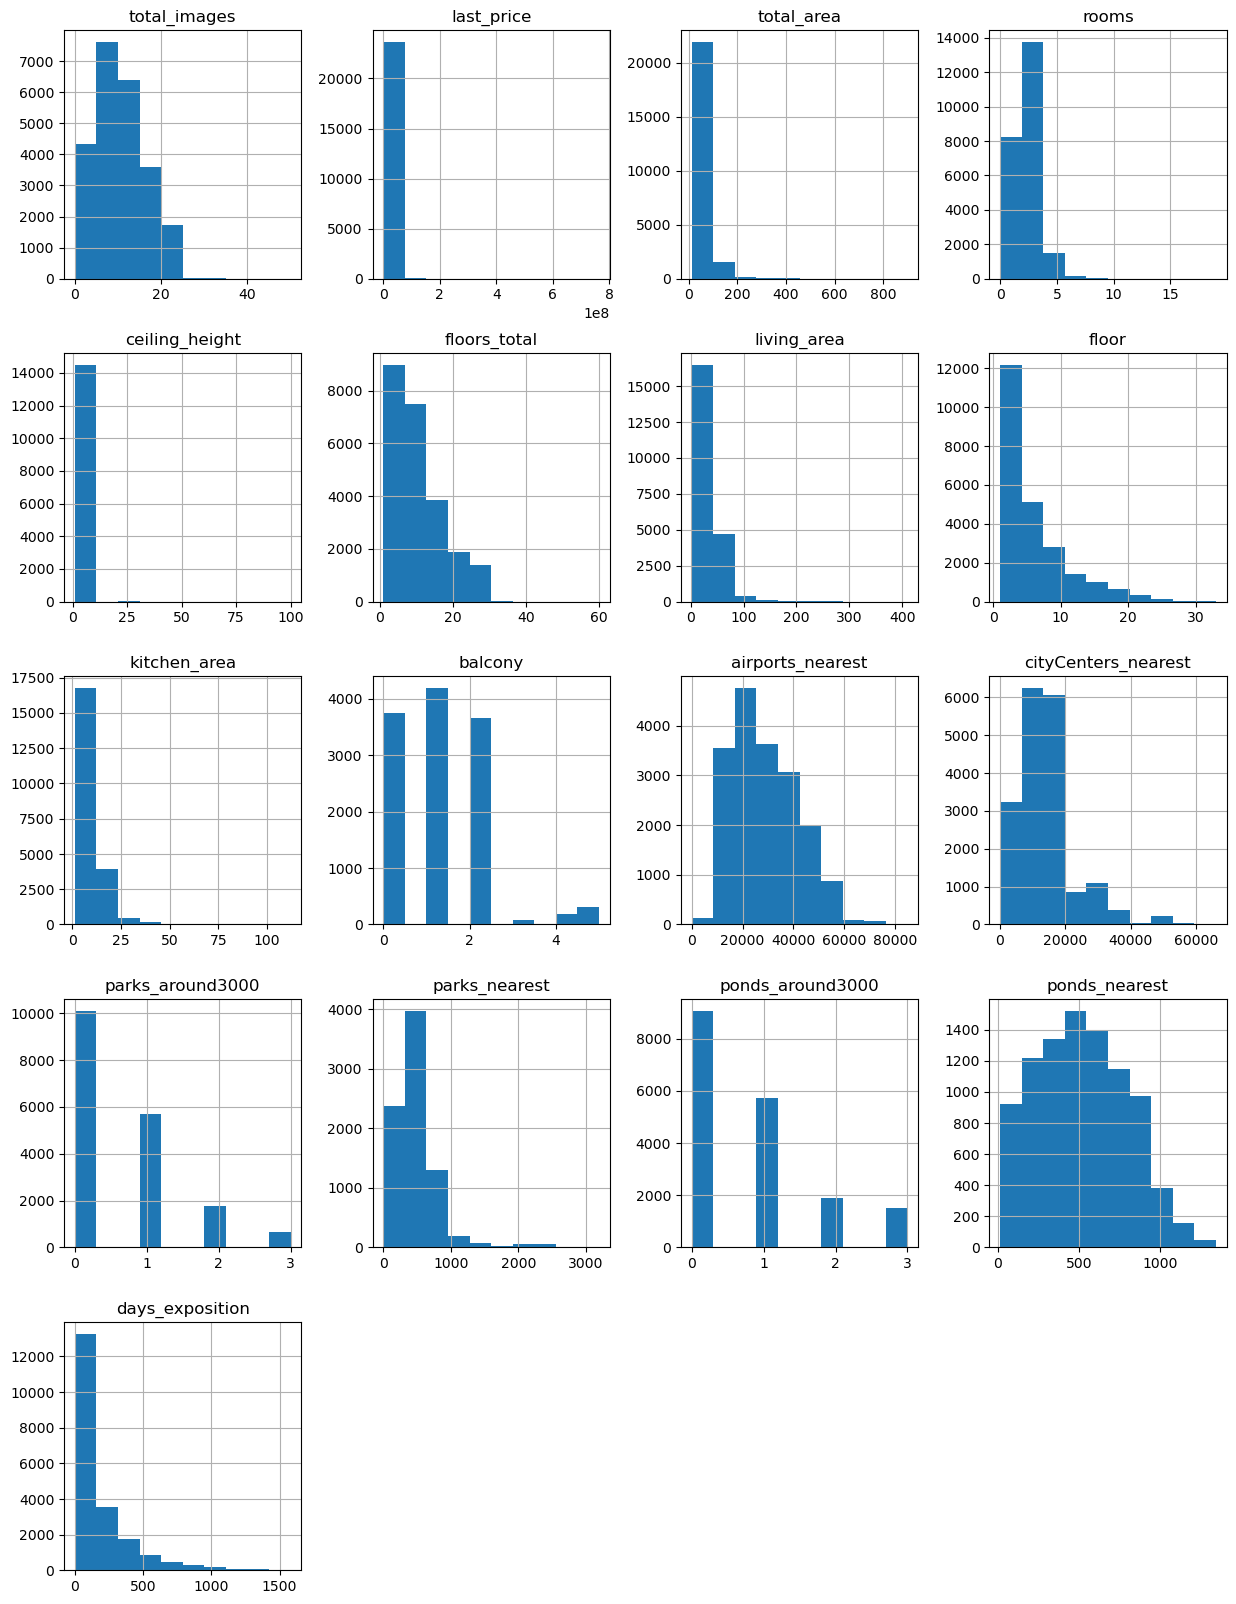

In [13]:
df.hist(figsize=(15, 20));

#### Вывод
В датафрейме 22 колонки, всего присутствует 23699 строк. Во многих колонках присутсвуют пропуски.
Необходимо выполнить предобработку данных:
- провести обработку пропущенных значений
- поменять типы данных в некоторых столбцах
- изучить уникальные значения и устранить неявные дубликаты
- обработать аномалии в столбцах


### Предобработка данных

#### Обработка пропущенных значений

Выведем долю пропущенных значений по каждой колонке датафрейма:

In [19]:
pd.DataFrame((df.isna().mean()*100).sort_values(ascending=False))

,0
is_apartment,88.290645
parks_nearest,65.909954
ponds_nearest,61.559559
balcony,48.605426
ceiling_height,38.799105
airports_nearest,23.384953
cityCenters_nearest,23.287902
ponds_around3000,23.283683
parks_around3000,23.283683
days_exposition,13.422507


На первый взгляд, в датафрейме есть много колонок с пропущенными данными, в некоторых строках пропущенные значения составляют более 20% от всех данных.

Разберёмся с тем, какие строки с пропущенными данными будем заполнять, а какие нет:

- *is_apartment* - 88% пропущенных значений. Данный параметр указывает на то, относится ли квартира к виду недвижимости "апартаменты". В апартаментах нельзя прописаться и получить за них налоговый вычет, поэтому они стоят дешевле. Эти данные помогли бы нам сделать оценку рыночной стоимости в зависимости от отнесения объекта недвижимости к данной категории. Можно предположить, что данное значение заполнено только теми собственниками, кто точно знает, что продаваемый им объект относится к категории апартаменты, так как это важный параметр. Вероятнее всего, остальные 88% объектов не относятся к типу недвижимости "апартаменты", поэтому заполним пропуски в них значением False.


- *ponds_around3000* - 23%, *parks_around3000* - 23% пропусков. Стоит заметить, что количество пропущенных значений в колонках *ponds_around3000* и *parks_around3000* совпадает. Сделаем предположение, что данные картографические данные не были добавлены системой по причине отсутствия таких объектов. Заполним пропуски в данных колонках на "0".


- *parks_nearest* - 66% пропусков, *ponds_nearest* - 62%, *airports_nearest* - 23%, *cityCenters_nearest* - 23% пропусков соответственно. Данные в этих строках - картографические, предполагаю, что они не были выгружены системой.  Беря в расчет то, что эти параметры не являются самыми важными и отсутствует возможность заполнить их какими-либо соответствующими действительности значениями, не испортив данные в целом, оставим пропуски в этих колонках нетронутыми.


- *balcony* - 48% пропусков. Предположим, что владельцы не указывали количество балконов в квартире по причине их отсутсвия. Таким образом, данные пропуски мы заполним 0-ми значениями.


- *ceiling_height* - 39% пропусков. Предполагаю, что многие собственники не знают высоту потолка в продаваемой квартире, не предпринимают шагов для того, чтобы её узнать и оставляют данное поле незаполненным. В пункте 2.4.4 рассмотрим более подробно данный столбец, пропуски заполним медианным значением. 


- *days_exposition* - 13% пропусков. Данный параметр указывает на то, сколько дней было размещено объявление (от публикации до снятия). Пропуски могут означать либо то, что сделка всё ещё не закрыта, либо то, что она закрыта, но объявление не сняли с публикации. Заполнить данные пропуски медианными значениями в соответствии с тем, как быстро продавались похожие квартиры, по моему мнению, будет не совсем правильно: мы не можем сравнивать квартиры по количественным параметрам не беря в расчет фактическое состояние этих квартир - возможно, что на фото всё выглядело прилично, а в жизни всё оказывалось наоборот и такие квартиры не продавались, либо, если сделка совершалась, но объявление не было снято - существует вероятность, что квартира была продана по другой цене. Оставим данные пропуски незаполненными.


- *kitchen_area* - 9%, *living_area* - 8% пропусков. Возможно, что владельцы данных квартир просто не заполнили данные колонки, либо что данные отсутствуют в квартирах, которые являются студиями. Стоит разобраться.


- *floors_total* - 0.4% пропусков. Данные могут отсутствовать по причине необязательности заполнения этих данных. Процент пропусков незначительный, удалим незаполненные строки.


- *locality_name* - 0.2% пропусков. Достаточно странно, что владельцы не указали наименование населенного пункта, в котором продается квартира. Процент пропусков незначительный, оставим эти данные незаполненными.

*Итак, выполняем заполнение пропусков в соответствии с планом выше:*

1. Заполняем пропуски в колонке 'is_apartment':

In [27]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print('Количество пропусков в столбце is_apartment:', df['is_apartment'].isna().sum())

Количество пропусков в столбце is_apartment: 0


2. Заполняем пропуски в колонках 'ponds_around3000', 'parks_around3000':

In [29]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
print('Количество пропусков в столбце ponds_around3000:', df['ponds_around3000'].isna().sum())
print('Количество пропусков в столбце parks_around3000:', df['parks_around3000'].isna().sum())

Количество пропусков в столбце ponds_around3000: 0
Количество пропусков в столбце parks_around3000: 0


3. Заполняем пропуски в колонке 'balcony':

In [31]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество пропусков в столбце balcony:', df['balcony'].isna().sum())

Количество пропусков в столбце balcony: 0


4. Проверим гипотезу о том, что строки 'kitchen_area', 'living_area' не заполнены потому, что квартиры в них являются студиями:

In [33]:
print('Количество пропусков в столбце kitchen_area', df['kitchen_area'].isna().sum())
print('Количество пропусков в столбце living_area', df['living_area'].isna().sum())

Количество пропусков в столбце kitchen_area 2278
Количество пропусков в столбце living_area 1903


In [34]:
df.query('rooms==0')[['kitchen_area', 'living_area']].isna().sum()

kitchen_area    197
living_area      14
dtype: int64

Исходя из полученных данных можно сделать вывод о том, что лишь малая часть пропусков в колонках относится к квартирам-студиям. 

Попробуем заполнить пропуски следующим образом:

1) найдем соотношение медианной общей площади к медианной жилой

2) заполним пропуски в столбце living_area отношением общей площади к найденному соотношению

In [38]:
living_area_corr = df['living_area'].median()/df['total_area'].median()
df['living_area'] = df['total_area']*living_area_corr
print('Количество пропусков в столбце living_area', df['living_area'].isna().sum())

Количество пропусков в столбце living_area 0


Те же самые манипуляции применим к столбцу 'kitchen_area':

In [40]:
kitchen_area_corr = df['kitchen_area'].median()/df['total_area'].median()
df['kitchen_area'] = df['total_area']*kitchen_area_corr
print('Количество пропусков в столбце kitchen_area', df['kitchen_area'].isna().sum())

Количество пропусков в столбце kitchen_area 0


5. Удалим незаполненные строки в колонке 'floors_total':

In [42]:
df = df.dropna(subset=['floors_total'])
print('Количество пропусков в столбце floors_total:', df['floors_total'].isna().sum())

Количество пропусков в столбце floors_total: 0


Выведем еще раз таблицу с долей пропущенных значений по колонкам:

In [44]:
pd.DataFrame((df.isna().mean()*100).sort_values(ascending=False))

,0
parks_nearest,65.929784
ponds_nearest,61.627070
ceiling_height,38.614323
airports_nearest,23.427773
cityCenters_nearest,23.330369
days_exposition,13.433278
locality_name,0.203278
kitchen_area,0.000000
ponds_around3000,0.000000
parks_around3000,0.000000


Уже лучше. 

*Вывод*

В итоге заполнили пропуски в колонках 'is_apartment'(заменили на False), 'ponds_around3000', 'parks_around3000', 'balcony' (во всех заменили отсутствующие значения на 0), в колонках 'living_area' и 'kitchen_area' заполнили пропуски умножением общей площади квартиры на коэффициент соотношения медианной жилой площади/площади кухни к общей площади квартиры, также удалили строки с пропущенными значениями в колонке 'floors_total'.

Заполнение пропусков по колонке 'ceiling_height' проведём после более подробного изучения столбца в п.2.4.4 проекта.

#### Изменение типов данных в столбцах

В файле присутствуют следующие типы данных:
- int64 (целые числа) в колонках total_images, rooms, floor
- float64 (вещественные числа) в колонках last_price, total_area, ceiling_height, floors_total, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition
- object (строки) в колонках first_day_exposition, is_apartment, locality_name
- bool (логич. тип данных) в строках studio, open_plan

Необходимо будет провести изменения в типах данных:
1) следующие строки приведем к типу int(целочисленные):
- *last_price*, чтобы убрать копейки в цене
- *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, так как данные в этих колонках отражают количественное значение этих объектов, оно не может быть в данных случаях не целочисленным

2) колонку *first_day_exposition* необходимо привести к формату datetime для последующей работы с ним, в колонке также содержатся данные о времени, но везде оно одинаковое - 00:00:00, поэтому приведем значения к дню.


Проведём изменения по порядку:

In [51]:
#меняем в столбцах формат на int:
column_to_int = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in column_to_int:
    df[column]=df[df[column].notnull()][column].astype(int)

In [52]:
#колонку first_day_exposition приводит к формату datetime и округляем до дня:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition']= df['first_day_exposition'].dt.round('1D')

Проверяем результат изменений:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony              

Отлично, можно двигаться дальше.

#### Удаление неявных дубликатов в столбце locality_name

Изучим уникальные значения и их количество в столбце с названиями населенных пунктов:

In [59]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [60]:
df['locality_name'].describe()

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object

Видим, что количество уникальных значений в данном столбце - 364, есть строчные и прописные буквы, е и ё, разные названия населённых пунктов - деревня, посёлок, городской посёлок, посёлок городского типа и т.д. 

Наметим такой план работы с уникальными значениями: 

1) добавим новый столбец, в котором переведём все строки в нижний регистр

2) заменим буквы "ё" на "е"

3) заменим названия "городской поселок", "поселок городского типа", "поселок станции" на "поселок"

4) устраним неявные дубликаты в названиях следующих населенных пунктов: "Никольское"-"село Никольское", "Кудрово"-"деревня Кудрово", "Мурино"-"поселок Мурино".

In [62]:
#шаг 1
df['locality_name_new'] = df['locality_name'].str.lower()

In [63]:
#шаг 2
df['locality_name_new'] = df['locality_name_new'].str.replace('ё', 'е')

In [64]:
#шаг 3
df['locality_name_new'] = df['locality_name_new'].str.replace('городской поселок', 'поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('поселок городского типа', 'поселок')
df['locality_name_new'] = df['locality_name_new'].str.replace('поселок станции', 'поселок')

In [65]:
#шаг 4
df['locality_name_new'] = df['locality_name_new'].str.replace('Никольское', 'село Никольское')
df['locality_name_new'] = df['locality_name_new'].str.replace('Кудрово', 'деревня Кудрово')
df['locality_name_new'] = df['locality_name_new'].str.replace('Мурино', 'поселок Мурино')

Посмотрим, что получилось:

In [67]:
df['locality_name_new'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [68]:
df['locality_name_new'].describe()

count               23565
unique                321
top       санкт-петербург
freq                15651
Name: locality_name_new, dtype: object

Количество уникальных значений сократилось с 364 до 321, уже лучше.

Чтобы в будущем проблем с неявными дубликатами не возникало, дадим рекомендацию разработчикам - сделать строку с выбором местонахождения типизированной по классификатору адресов РФ, чтобы пользователи не могли сами внести название, какое им вздумается, а выбирали из выпадающего списка.

#### Обработка редких и выбивающихся значений

* Изучим значения в датафрейме с помощью метода describe():

In [73]:
pd.options.display.float_format = '{: .2f}'.format #зададим формат для удобства изучения данных
df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.00,23613.00,23613.00,23613,23613.00,14495.00,23613.00,23613.00,23613.00,23613.00,23613.00,18081.00,18104.00,23613.00,8045.00,23613.00,9061.00,20441.00
mean,9.87,6540555.46,60.34,2017-11-09 06:29:41.018930176,2.07,2.77,10.67,34.81,5.88,10.56,0.59,28788.01,14185.08,0.47,490.55,0.59,518.21,180.88
min,0.00,12190.00,12.00,2014-11-27 00:00:00,0.00,1.00,1.00,6.92,1.00,2.10,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,2017-05-15 00:00:00,1.00,2.52,5.00,23.08,2.00,7.00,0.00,18575.00,9233.75,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2017-12-12 00:00:00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26726.00,13093.00,0.00,455.00,0.00,503.00,95.00
75%,14.00,6799000.00,69.80,2018-08-25 00:00:00,3.00,2.80,16.00,40.27,8.00,12.21,1.00,37242.00,16287.00,1.00,612.00,1.00,730.00,232.00
max,50.00,763000000.00,900.00,2019-05-03 00:00:00,19.00,100.00,60.00,519.23,33.00,157.50,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00
std,5.68,10901722.74,35.65,NaN,1.08,1.26,6.60,20.57,4.87,6.24,0.96,12626.21,8614.13,0.75,341.34,0.88,277.89,219.69


Изучим более подробно следующие колонки, в которых будем устранять редкие и выбивающиеся значения, и построим для каждой из них диаграмму размаха:
*last_price*, *total_area*, *rooms*, *ceiling_height*, *days_exposition*

##### Обработка колонки 'last_price':

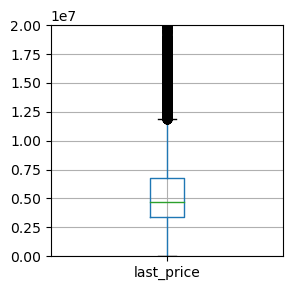

In [76]:
df.boxplot(column='last_price', figsize=(3,3))
plt.ylim(0,20000000);

Есть выбивающиеся значения - квартиры ценой 12190 руб., что скорее всего является ошибкой в данных и цена указана в тыс.руб., также есть квартира за 763 млн.руб. - площадью 400 кв.м., с 7-ю комнатами, в центре города Санкт-Петербург.

Из ящика с усами видим, что верхняя граница усов упирается в границу цены 12 млн.руб.

Установим следующий фильтр для значений в столбце 'last_price':
от 0 до 12 000 000 руб.

##### Обработка колонки 'total_area':

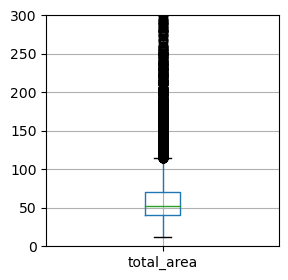

In [79]:
df.boxplot(column='total_area', figsize=(3,3))
plt.ylim(0,300);

Минимальная имеющаяся в выборке площадь квартиры - 12 кв.м.(однокомнатная квартира в центре города), максимальная - 900 кв.м. (12-ти комнатная квартира за 420 млн. руб. на 25 этаже, скорее всего с несколькими уровнями).

В колонке 'total_area' установим следующий фильтр в соответствии с диаграммой размаха:

от 20 до 130 кв.м.

##### Обработка колонки 'rooms':

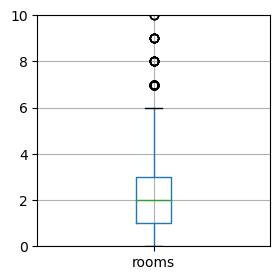

In [83]:
df.boxplot(column='rooms', figsize=(3,3))
plt.ylim(0,10);

В колонке с количеством комнат есть как квартиры с 0-комнат (студии), так и 19-комнатная квартира (стоимостью 32 млн. руб. и площадью 374 кв.м., возможно коммунальная)

Уберем выбросы и в колонке 'rooms' поставим границы от 0 до 6 комнат, в соответствии с "усами" на диаграмме.

##### Обработка колонки 'ceiling_height':

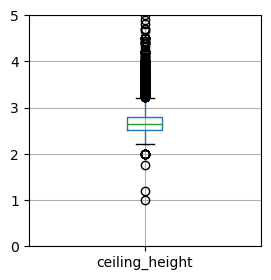

In [87]:
df.boxplot(column='ceiling_height', figsize=(3,3))
plt.ylim(0,5);

Изучим значения в колонке "ceiling_height" более подробно:

In [89]:
df['ceiling_height'].isna().sum()

9118

In [90]:
df['ceiling_height'].describe()

count    14495.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


в колонке с высотой потолков 38,8% данных отсутствуют. Предполагаю, что многие собственники не знают высоту потолка в продаваемой квартире, не предпринимают шагов для того, чтобы её узнать и оставляют данное поле незаполненным. 

Есть квартиры с 1-метровыми потолками и 100-метровыми.

Необходимо разбираться.


Выведем уникальные значения столбца 'ceiling_height':

In [93]:
ceiling_height_unique = df['ceiling_height'].unique()
ceiling_height_unique.sort()
ceiling_height_unique

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В данных есть редкие и выбивающиеся значения - квартиры с высотой потолков 20 метров и более. Предположим, что на самом деле это вещественные значения, исправим значения в этих строках:

In [95]:
df['ceiling_height']=df['ceiling_height'].where(df['ceiling_height']<20.0, df['ceiling_height']/10.0)

Посмотрим, что получилось:

In [97]:
ceiling_height_unique = df['ceiling_height'].unique()
ceiling_height_unique.sort()
ceiling_height_unique

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Также уберём выбивающиеся значения в соответствии с диаграммой размаха: оставим значения от 2,4 до 3,5 м.

Ошибки исправлены, теперь можно перейти к заполнению пропусков в данных:

In [100]:
#заполним пропущенные значения в колонке ceiling_height медианным значением
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].median())
print('Количество пропусков в столбце ceiling_height', df['ceiling_height'].isna().sum())

Количество пропусков в столбце ceiling_height 0


##### Обработка колонки 'days_exposition':

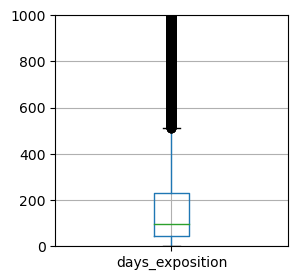

In [104]:
df.boxplot(column='days_exposition', figsize=(3,3))
plt.ylim(0,1000);

В колонке присутствуют объекты, которые продавались за 1 день, также есть объект со временем продажи в 1580 дней (более 4х лет).

В соответствии с диаграммой размаха, оставим в выборке значения от 1 до 500 дней.

##### Составление датафрейма с учетом фильтров по редким и выбивающимся значениям

Создадим новый датафрейм good_df, в который запишем отфильтрованные колонки в соответствии с условиями выше:

In [109]:
#оставляем в новом датафрейме строки, где цена меньше 12 млн руб
good_df = df.query('last_price <=12000000')

In [110]:
#фильтруем по общей площади (оставляем от 20 до 130 кв м)
good_df = good_df.query('20.00 <= total_area <= 130.00')

In [111]:
#фильтруем по количеству комнат (меньше 6)
good_df = good_df.query('rooms < 6')

In [112]:
#фильтруем по высоте потолка (от 2.4 до 3.5)
good_df = good_df.query('ceiling_height.isnull() or 2.4 <= ceiling_height <= 3.5')

In [113]:
#оставляем строки, где кол-во дней от размещения до снятия меньше 500
good_df = good_df.query('days_exposition.isnull() or days_exposition < 500')

Посмотрим, что получилось:

In [115]:
good_df.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,19955.00,19955.00,19955.00,19955,19955.00,19955.00,19955.00,19955.00,19955.00,19955.00,19955.00,14861.00,14873.00,19955.00,6131.00,19955.00,7070.00,17339.00
mean,9.78,4820753.01,52.80,2017-12-31 10:35:27.707341568,1.92,2.66,10.84,30.46,5.92,9.24,0.60,28997.91,15073.54,0.41,488.18,0.52,537.27,124.03
min,0.00,12190.00,20.00,2014-11-27 00:00:00,0.00,2.40,1.00,11.54,1.00,3.50,0.00,0.00,287.00,0.00,1.00,0.00,16.00,1.00
25%,6.00,3300000.00,39.00,2017-07-17 00:00:00,1.00,2.60,5.00,22.50,2.00,6.82,0.00,17953.00,10787.00,0.00,291.00,0.00,322.00,40.00
50%,9.00,4400000.00,49.00,2018-01-19 00:00:00,2.00,2.65,9.00,28.27,4.00,8.57,0.00,27357.00,13704.00,0.00,456.00,0.00,527.00,80.00
75%,14.00,5950000.00,63.00,2018-09-11 00:00:00,3.00,2.65,16.00,36.35,8.00,11.02,1.00,37868.00,16715.00,1.00,612.00,1.00,749.00,177.00
max,50.00,12000000.00,130.00,2019-05-03 00:00:00,5.00,3.50,60.00,75.00,33.00,22.75,5.00,84853.00,65952.00,3.00,3190.00,3.00,1344.00,499.00
std,5.56,2219433.74,18.21,NaN,0.89,0.15,6.65,10.51,4.91,3.19,0.95,13043.44,8404.86,0.70,325.70,0.82,276.10,117.55


#### Вывод

В данном шаге работы провели следующие изменения:

1) обработаны пропуски:

- в колонке 'is_apartment' пропуски заменены на False, 
- в колонках 'ponds_around3000', 'parks_around3000', 'balcony' отсутствующие значения заменены на 0,
- в колонках 'living_area' и 'kitchen_area' пропуски заполнены произведением общей площади квартиры ('total_area') и коэффициентом отношения жилой площади (или площади кухни) к общей площади квартиры.
- пропуски в столбце 'ceiling_height' заполнены медианным значением высоты потолков.
- удалены строки с пропущенными значениями в колонке 'floors_total'.

2) изменены типы данных в столбцах:

- строки *last_price*, *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000* приведены к типу int(целочисленные)
- колонка *first_day_exposition* приведена к формату datetime, округлена до дня.

3) обработаны неявные дубликаты в столбце 'locality_name', добавлен новый столбец 'locality_name_new', в котором:

- все строки переведены в нижний регистр
- заменены буквы "ё" на "е"
- заменены названия "городской поселок", "поселок городского типа", "поселок станции" на "поселок"
- устранены неявные дубликаты в названиях следующих населенных пунктов: "Никольское"-"село Никольское", "Кудрово"-"деревня Кудрово", "Мурино"-"поселок Мурино".

В результате количество уникальных значений по названию населенных пунктов сократилось с 364 до 321.

4) обработаны редкие и выбивающиеся значения:

- колонка с ценой на момент снятия с публикации ('last_price') отфильтрована в пределах значений от 0 до 12 млн. руб.
- общая площадь квартиры в кв.м. ('total_area') отфильтрована в границах от 20 до 130 кв.м.
- количество комнат ('rooms') оставлены в пределах от 0 (студии) до 6.
- высота потолков ('ceiling_height') откорректирована следующим образом - убраны значения ниже 2.4 м и выше 3.5 м, а также исправлены значения высоты потолков выше 20 м.-они приведены к вещественному формату.
- в колонке с кол-вом дней публикации объявления (от размещения до снятия) ('days_exposition') убраны строки с кол-вом дней ниже 500, оставлены незаполненные строки, чтобы избежать большой потери данных.

Таким образом, объем датафрейма сократился на 15,7% по сравнению с изначальным (с 23699 до 19955 строк).

### Добавление в таблицу новых столбцов

#### Добавление цены одного квадратного метра:

In [122]:
#поделим last_price на total_area и посчитаем квадртный метр (price_per_area)
good_df['price_per_area']=good_df['last_price']/good_df['total_area']
#и приведем строку к целочисленному формату для удобства
good_df['price_per_area']=good_df['price_per_area'].astype(int)

#### Добавление колонки с днем недели, месяцем, годом публицации объявления:

In [124]:
#извлечем из поля first_day_exposition день недели (day_of_week), месяц (month) и год публикации объявления (year):
good_df['day_of_week']=good_df['first_day_exposition'].dt.weekday
good_df['month']=good_df['first_day_exposition'].dt.month
good_df['year']=good_df['first_day_exposition'].dt.year

#### Добавление колонки с типом этажа квартиры (значения — «первый», «последний», «другой»):

In [126]:
#добавим колонку floor_type, в которую запишем значения "другой":
good_df['floor_type']='другой'
#исправим в колонке 'floor_type' значения на тип этажа "первый", если значение в этой колонке равно 1:
good_df['floor_type']=good_df['floor_type'].where(good_df['floor'] != 1, 'первый')
#исправим значения на тип этажа последний, если значение в колонке floor_type равно значению в колонке "floors_total":
good_df['floor_type']=good_df['floor_type'].where(good_df['floor'] != good_df['floors_total'], 'последний')

#### Добавление колонки с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений):

In [128]:
#добавим столбец 'center_distance_km', 
#в который посчитаем целочисленное расстояние до центра в километрах
#по полю cityCenters_nearest:
good_df['center_distance_km']=(good_df['cityCenters_nearest']/1000).round()

Посмотрим, что получилось:

In [130]:
pd.set_option('display.max_columns', None)
good_df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_per_area,day_of_week,month,year,floor_type,center_distance_km
1,7,3350000,40.40,2018-12-04,1,2.65,11,23.31,1,False,False,False,7.07,2,посёлок Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,поселок шушары,82920,1,12,2018,первый,19.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,57.69,13,False,False,False,17.50,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,санкт-петербург,100000,1,6,2018,другой,8.00
5,10,2890000,30.40,2018-09-10,1,2.65,12,17.54,5,False,False,False,5.32,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00,поселок янино-1,95065,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26,21.52,6,False,False,False,6.53,1,посёлок Парголово,52996.00,19143.00,0,NaN,0,NaN,155.00,поселок парголово,99195,3,11,2017,другой,19.00
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.31,22,False,False,False,12.53,2,Санкт-Петербург,23982.00,11634.00,0,NaN,0,NaN,NaN,санкт-петербург,110544,3,4,2019,другой,12.00
8,20,2900000,33.16,2018-05-23,1,2.65,27,19.13,26,False,False,False,5.80,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.00,поселок мурино,87454,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,35.19,7,False,False,False,10.67,2,Санкт-Петербург,50898.00,15008.00,0,NaN,0,NaN,289.00,санкт-петербург,88524,6,2,2017,другой,15.00
10,5,5050000,39.60,2017-11-16,1,2.67,12,22.85,3,False,False,False,6.93,0,Санкт-Петербург,38357.00,13878.00,1,310.00,2,553.00,137.00,санкт-петербург,127525,3,11,2017,другой,14.00
11,9,3300000,44.00,2018-08-27,2,2.65,5,25.38,4,False,False,False,7.70,1,Ломоносов,48252.00,51677.00,0,NaN,0,NaN,7.00,ломоносов,75000,0,8,2018,другой,52.00
12,10,3890000,54.00,2016-06-30,2,2.65,5,31.15,5,False,False,False,9.45,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90.00,сертолово,72037,3,6,2016,последний,NaN


#### *Вывод*

Таким образом, в этом пункте мы добавили 6 новых колонок:
- *price_per_area* цена одного квадратного метра 
- *day_of_week* день недели публикации объявления
- *month* месяц публикации объявления
- *year* год публикации объявления
- *floor_type* тип этажа квартиры (первый, последний, другой)
- *center_distance_km* расстояние до центра города в километрах

### Исследовательский анализ данных

#### Изучим параметры объектов и построим гистрограммы для каждого параметра отдельно:

##### Изучение общей площади ('total_area'):

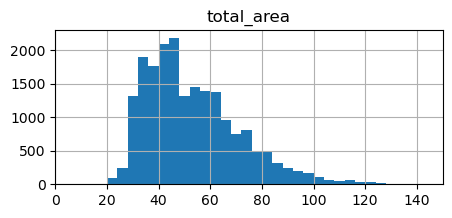

In [136]:
good_df.hist('total_area', bins=50, range=(0,200), figsize=(5,2))
plt.xlim(0,150);

In [137]:
good_df['total_area'].describe()

count    19955.00
mean        52.80
std         18.21
min         20.00
25%         39.00
50%         49.00
75%         63.00
max        130.00
Name: total_area, dtype: float64

Общая площадь основной части объектов находится в пределах от 39 до 63 кв.м. Минимальная площадь объекта после отсечения выбивающихся значений - 20 кв.м., максимальная - 130 кв.м. Есть несколько четких пиков - около 35 кв.м., 49 кв.м. и около 65 кв.м., вероятно, что это стандартная площадь для 1, 2-х и 3-х комнатных квартир. Медиана (49 кв.м.) и среднее (52.8 кв.м.) находятся близко, что может говорить о том, что выбранная фильтрация выбивающихся и уникальных значений была выбрана правильно и они не сильно влияют на выборку.

##### Изучение жилой площади ('living_area'):

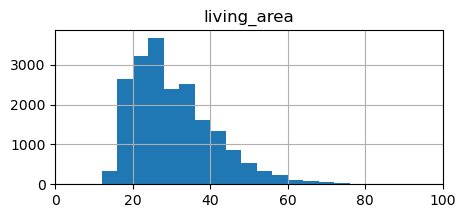

In [140]:
good_df.hist('living_area', bins=50, range=(0,200), figsize=(5,2))
plt.xlim(0,100);

In [141]:
good_df['living_area'].describe()

count    19955.00
mean        30.46
std         10.51
min         11.54
25%         22.50
50%         28.27
75%         36.35
max         75.00
Name: living_area, dtype: float64

Жилая площадь основной части объектов находится в диапазоне от 22 до 36 кв.м. Видно три пика - в районе 21, 27 и 35 кв.м., что скорее всего совпадает с пиками в общей площади объектов и представляет собой 1, 2-х и 3-х комнатные квартиры соответственно.

##### Изучение площади кухни ('kitchen_area'):

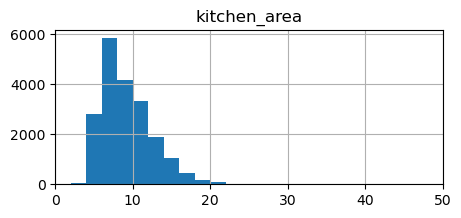

In [144]:
good_df.hist('kitchen_area', bins=100, range=(0,200), figsize=(5,2))
plt.xlim(0,50);

In [145]:
good_df['kitchen_area'].describe()

count    19955.00
mean         9.24
std          3.19
min          3.50
25%          6.82
50%          8.57
75%         11.02
max         22.75
Name: kitchen_area, dtype: float64

Основная часть площадей кухонь в нашей выборке - от 7 до 11 кв.м. Медиана находится в районе 9 кв.м., среднее арифметическое - 9,2 кв.м. Данные совпадают с реальностью - небольшие кухни до 10 кв. м. характерны для нашей страны.

##### Изучение цены объекта('last_price'):

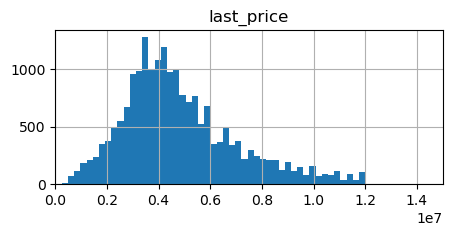

In [148]:
good_df.hist('last_price', bins=50, figsize=(5,2))
plt.xlim(0,15000000);

In [149]:
good_df['last_price'].describe()

count       19955.00
mean      4820753.01
std       2219433.74
min         12190.00
25%       3300000.00
50%       4400000.00
75%       5950000.00
max      12000000.00
Name: last_price, dtype: float64

Цена продажи основной части объектов находится в районе 3,3-5,9 млн. руб. Есть редкие значения - 12 тыс. руб., скорее всего вызванные ошибками в данных, цена указана в тыс.руб., а не в руб. Медиана и среднее значение отличаются друг от друга на 400 тыс. руб. (менее 8%), можно считать, что выбивающиеся значения не сильно влияют на выборку.

##### Изучение количества комнат('rooms'):

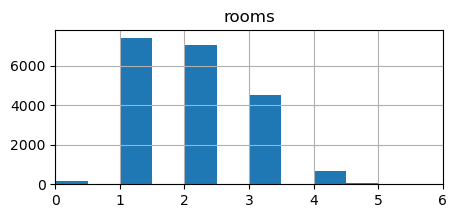

In [152]:
good_df.hist('rooms', figsize=(5,2))
plt.xlim(0,6);

In [153]:
good_df['rooms'].describe()

count    19955.00
mean         1.92
std          0.89
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          5.00
Name: rooms, dtype: float64

Основная часть объектов имеет от 1 до 3 комнат, после того, как мы отфильтровали выбивающиеся значения, максимальное число комнат в выборке - 6. Данные выглядят правдоподобно.

##### Изучение высоты потолков('ceiling_height'):

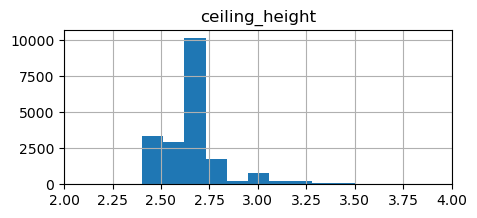

In [156]:
good_df.hist('ceiling_height', figsize=(5,2))
plt.xlim(2,4);

In [157]:
good_df['ceiling_height'].describe()

count    19955.00
mean         2.66
std          0.15
min          2.40
25%          2.60
50%          2.65
75%          2.65
max          3.50
Name: ceiling_height, dtype: float64

Высота потолков у большей части выборки - от 2.6 до 2.65 м, максимальное значение в полученной выборке - 3.5 метра.

##### Изучение этажа квартиры('floor'):

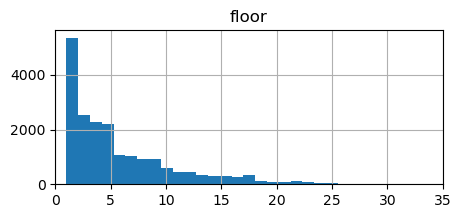

In [160]:
good_df.hist('floor', bins=30, figsize=(5,2))
plt.xlim(0,35);

In [161]:
good_df['floor'].describe()

count    19955.00
mean         5.92
std          4.91
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

Основная часть квартир находится со 2 по 8 этаж. Есть квартиры, находящиеся на 1 и на 33 этажах.

##### Изучение типа этажа квартиры («первый», «последний», «другой»)('floor_type'):

In [164]:
good_df['floor_type'].describe()

count      19955
unique         3
top       другой
freq       14678
Name: floor_type, dtype: object

In [165]:
good_df['floor_type'].value_counts()

floor_type
другой       14678
последний     2757
первый        2520
Name: count, dtype: int64

12,6% квартир в выборке находится на первом этаже, 13,8% на последнем. 

Остальные 73,5% квартир находятся на других этажах.

##### Изучение общего количества этажей в доме('floors_total'):

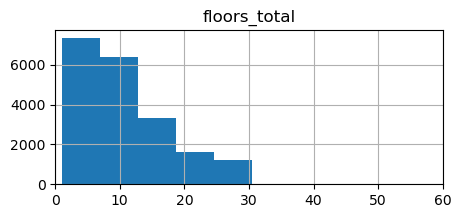

In [168]:
good_df.hist('floors_total', figsize=(5,2))
plt.xlim(0,60);

In [169]:
good_df['floors_total'].describe()

count    19955.00
mean        10.84
std          6.65
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Этажность основной части домов в выборке находится в диапазоне от 5 до 16 этажей. Есть одноэтажные дома и 60-этажный. 60-этажный дом находится в Кронштадте, и видимо, это ошибка в данных, таких высоких домов там нет.

##### Изучение расстояния до центра города в метрах('cityCenters_nearest'):

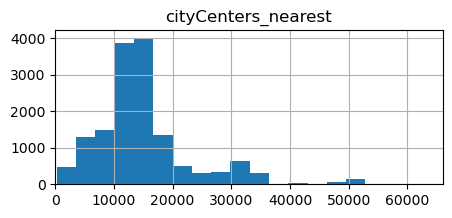

In [172]:
good_df.hist('cityCenters_nearest', bins=20, figsize=(5,2))
plt.xlim(0,66000);

In [173]:
good_df['cityCenters_nearest'].describe()

count    14873.00
mean     15073.54
std       8404.86
min        287.00
25%      10787.00
50%      13704.00
75%      16715.00
max      65952.00
Name: cityCenters_nearest, dtype: float64

Основная часть объектов находится от 11 до 17 км от центра города. 

Есть квартиры в самом центре, а самая дальняя квартира находится в 66 км от города, в поселке Молодежное.
Отсутствуют данные о расстоянии до центра у 25% выборки. Можно предположить, что данные автоматически указаны только для объектов в городе Санкт-Петербург. Для объектов, находящихся в области (деревнях, поселках, городах Выборг, Гатчина и др.) данные автоматически не добавляются.

##### Изучение расстояния до ближайшего аэропорта('airports_nearest'):

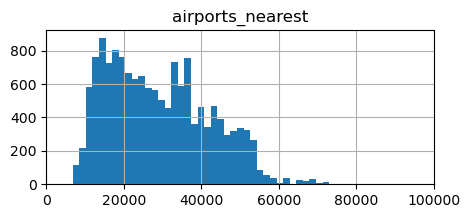

In [176]:
good_df.hist('airports_nearest', bins=50, figsize=(5,2))
plt.xlim(0,100000);

In [177]:
good_df['airports_nearest'].describe()

count    14861.00
mean     28997.91
std      13043.44
min          0.00
25%      17953.00
50%      27357.00
75%      37868.00
max      84853.00
Name: airports_nearest, dtype: float64

Расстояние до аэропорта у большей части выборки - от 18 до 38 км. 

Есть квартира рядом с аэропортом Пулково (расстояние до центра в ней около 23 км, как раз на таком расстоянии от города находится аэропорт), и самая дальняя квартира от аэропорта - в поселке Молодежное.
Отсутствуют данные о расстоянии до аэропорта у 25% выборки, скорее всего данные также отсутсвуют у объектов в области (как в случае с данными о расстоянии до центра города).

##### Изучение расстояния до ближайшего парка('parks_nearest'):

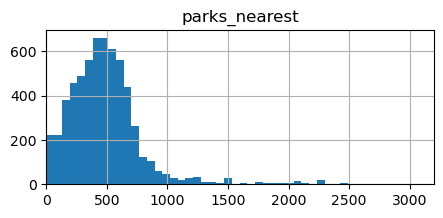

In [180]:
good_df.hist('parks_nearest', bins=50, figsize=(5,2))
plt.xlim(0,3200);

In [181]:
good_df['parks_nearest'].describe()

count    6131.00
mean      488.18
std       325.70
min         1.00
25%       291.00
50%       456.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64

В выборке данные о расстоянии до парка присутствуют только в 31% случаев. В них основная часть объектов имеет расстояние до парка в диапазоне от 291 до 612 метров. 
Есть квартира, которая находится в 1 м от парка (в 16 км от центра Санкт-Петербурга), максимальное расстояние до парка - 3 км (две квартиры, находящиеся в 10 км от центра). Данные о парках на расстоянии дальше, чем 3 км отсутствуют. Скорее всего картографические данные по паркам добавляются только в тех случаях, когда ближайший парк находится на расстоянии 3 км и меньше.

##### Изучение дня и месяца публикации объявления('day_of_week', 'month'):

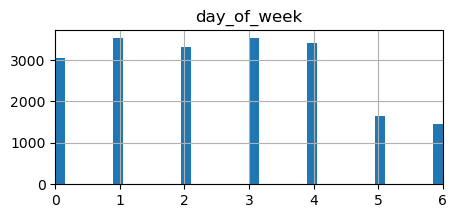

In [184]:
good_df.hist('day_of_week', bins=40, figsize=(5,2))
plt.xlim(0,6);

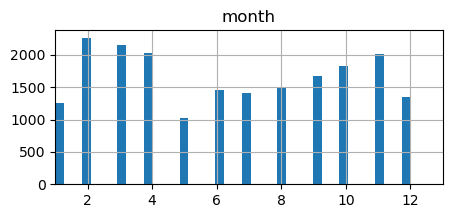

In [185]:
good_df.hist('month', bins=40, figsize=(5,2))
plt.xlim(1,13);

In [186]:
good_df['day_of_week'].describe()

count    19955.00
mean         2.58
std          1.80
min          0.00
25%          1.00
50%          3.00
75%          4.00
max          6.00
Name: day_of_week, dtype: float64

In [187]:
good_df['month'].describe()

count    19955.00
mean         6.40
std          3.49
min          1.00
25%          3.00
50%          6.00
75%         10.00
max         12.00
Name: month, dtype: float64

Чаще всего объявления публикуются в рабочие дни - с понедельника по пятницу, в субботу и воскресенье публикуется почти в два раза меньше объявлений по сравнению с буднями.
Наблюдается некоторая сезонность в публикации объявлений - кол-во опубликованных объявлений снижается в летний период (с мая по август), также рынок падает в декабре-январе. Самые активные месяцы - февраль, март, апрель и ноябрь.

##### Вывод: 

Изучив каждый столбец в отдельности, опишем основные показатели большей части объектов в получившейся выборке:
- общая площадь ('total_area') основной части объектов находится в пределах от 39 до 63 кв.м.
- жилая площадь ('living_area') от 22 до 36 кв.м.
- у большей части объектов площадь кухни ('kitchen_area') - от 7 до 11 кв.м. 
- цена продажи ('last_price') основной части объектов находится в районе 3,3-5,9 млн. руб. 
- число комнат -  от 1 до 3.
- высота потолков - от 2.6 до 2.65 м.
- основная часть квартир находится со 2 по 8 этаж.
- 12,6% квартир в выборке находится на первом этаже, 13,8% на последнем. Остальные 73,5% квартир находятся на других этажах.
- этажность основной части домов в выборке находится в диапазоне от 5 до 16 этажей.
- расстояние до центра города Санкт-Петербург - от 11 до 17 км от центра города. Отсутствуют данные о расстоянии до центра у 25% выборки. Было предположено, что для объектов, находящихся в области (деревнях, поселках, городах Выборг, Гатчина и др.) данные автоматически не добавляются.
- расстояние до аэропорта у большей части выборки - от 18 до 38 км. Отсутствуют данные о расстоянии до аэропорта у 25% выборки, скорее всего данные также отсутствуют у объектов в области (как в случае с данными о расстоянии до центра города).
- данные о расстоянии до парка присутствуют только у 31% объекта выборки. В них основная часть объектов имеет расстояние до парка в диапазоне от 291 до 612 метров. Скорее всего картографические данные по паркам добавляются только в тех случаях, когда ближайший парк находится на расстоянии 3 км и меньше.
- чаще всего объявления публикуются в рабочие дни - с понедельника по пятницу, в субботу и воскресенье публикуется почти в два раза меньше объявлений по сравнению с буднями. Наблюдается некоторая сезонность в публикации объявлений - кол-во опубликованных объявлений снижается в летний период (с мая по август), также рынок падает в декабре-январе. Самые активные месяцы - февраль, март, апрель и ноябрь.


#### Изучим как быстро продавались квартиры (столбец days_exposition):

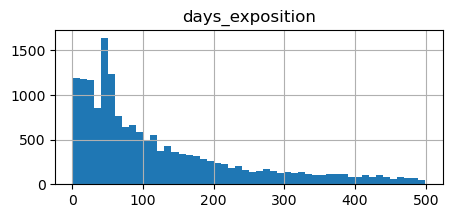

In [191]:
good_df.hist('days_exposition',bins=50, figsize=(5,2));

In [192]:
good_df['days_exposition'].describe()

count    17339.00
mean       124.03
std        117.55
min          1.00
25%         40.00
50%         80.00
75%        177.00
max        499.00
Name: days_exposition, dtype: float64

На гистограмме есть два пика, в районе 40-60 дней, рассмотрим их подробнее, построив сводную таблицу по кол-ву объявлений с датой продажи в этих днях:

In [194]:
good_df.pivot_table(index='days_exposition', values='last_price', aggfunc=('count', 'mean')).sort_values(by='count', ascending=False).head()

,count,mean
days_exposition,,
45.00,867,3153425.25
60.00,531,5986396.79
7.00,222,4679267.85
30.00,196,4967542.63
4.00,165,4821738.19


По данной сводной таблице видно, что есть объявления с днями продажи 45 (5% от всех данных) дней и 60 (3%) дней.
Посмотрев информацию на сайте Яндекс, можно сделать вывод о том, что скорее всего сроки в 45 и 60 дней раньше являлись стандартными сроками бесплатного размещения объявления для продажи квартиры. Эти сроки определялись стоимостью объекта недвижимости. В данный момент времени (январь 2023 г.) эти сроки видимо были изменены.

##### Вывод

Основная часть объектов продавалась в диапазоне от 40 до 177 дней. Медиана составляет 80 дней, продажа квартиры менее чем за 3 месяца является хорошим показателем.

Максимально быстрая продажа - 1 день, самая долгая - 499 дней (1 год и 4 месяца).

Из выборки были исключены выбросы, однако выбивающиеся значения влияют на среднее - оно составляет 124 дня, в то время как медиана - 80 дней. Выбивающиеся значения видны на гистограмме - у нее длинный хвост высоких значений(выше 200 дней).

#### Изучение влияния факторов на общую (полную) стоимость объекта:

Ответим на вопрос - Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

##### Зависимость цены от общей площади

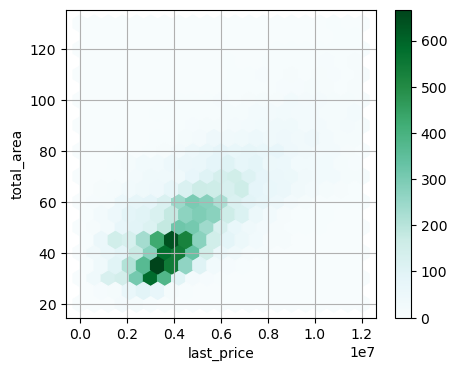

In [200]:
#построим график зависимости цены от общей площади квартиры
good_df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(5,4), sharex=False, grid=True);

In [201]:
#расчитаем коэффициент корреляции Пирсона:
good_df['last_price'].corr(good_df['total_area'])

0.7004879740885949

*Вывод:* Зависимость цены от общей площади есть, коэффициент корреляции равен 0,7, чем больше площадь - тем выше цена.

##### Зависимость цены от жилой площади

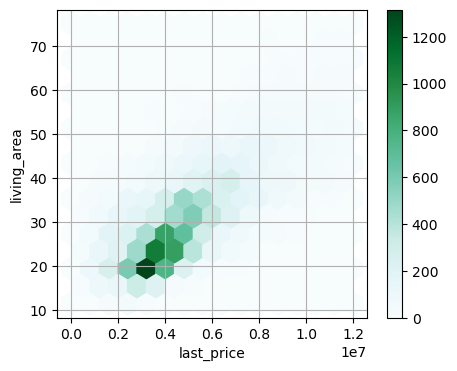

In [204]:
#построим график зависимости цены от жилой площади квартиры
good_df.plot(x='last_price', y='living_area', kind='hexbin', gridsize=15, figsize=(5,4), sharex=False, grid=True);

In [205]:
#расчитаем коэффициент корреляции Пирсона:
good_df['last_price'].corr(good_df['living_area'])

0.7004879740885954

*Вывод:* Зависимость цены от жилой площади отслеживается - чем больше жилая площадь, тем выше цена продажи. Однако, коэффициент корреляции равен 0,57, что говорит о том, что взаимосвязь есть, однако она не слишком сильная. Увеличение жилой площади приводит к увеличению стоимости, но так бывает не всегда.

##### Зависимость цены от площади кухни

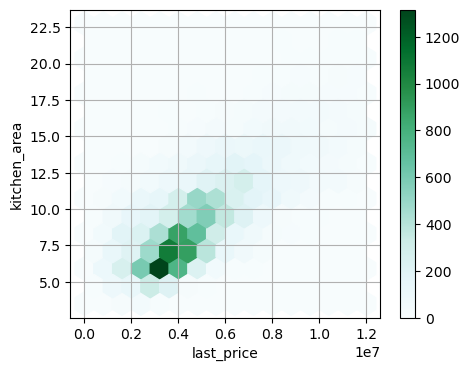

In [208]:
#построим график зависимости цены от площади кухни
good_df.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=15, figsize=(5,4), sharex=False, grid=True);

In [209]:
#расчитаем коэффициент корреляции Пирсона:
good_df['last_price'].corr(good_df['kitchen_area'])

0.7004879740885953

*Вывод:* Коэффициент корреляции равен 0,48, зависимость цены от площади кухни есть, но не слишком сильная. Увеличение площади кухни не всегда приводит к увеличению цены.

##### Зависимость цены от количества комнат

In [212]:
#создадим сводную таблицу по кол-ву комнат и средней цене:
good_df.pivot_table(index='rooms', values='last_price', aggfunc='median')

,last_price
rooms,
0,2740000.00
1,3599499.50
2,4650000.00
3,5700000.00
4,6900000.00
5,8300000.00


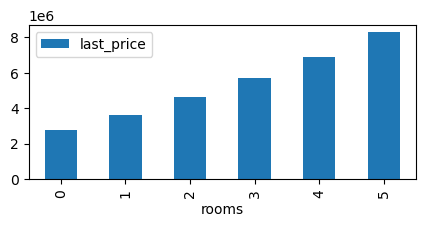

In [213]:
#построим график, отражающий данную зависимость:
good_df.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(5,2));

*Вывод:* Чем больше комнат, тем выше цена. Ожидаемо. 

##### Зависимость цены от этажа, на котором расположена квартира

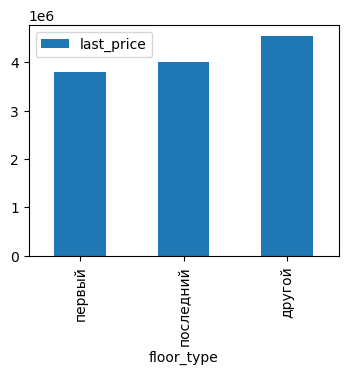

In [216]:
#создадим сводную таблицу и построим график зависимости цены от этажа:
good_df.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=True).plot(y='last_price', kind='bar', figsize=(4,3));

In [217]:
#посчитаем коэффициент корреляции Пирсона:
good_df['last_price'].corr(good_df['floor'])

0.13984425634798964

*Вывод:* дешевле всех квартиры на первом этаже, далее идет последний этаж, следом все остальные. Коэффициент корреляции небольшой - 0,14. Этаж квартиры оказывает малое влияние на её стоимость.

##### Зависимость цены от даты размещения (день недели, месяц, год)

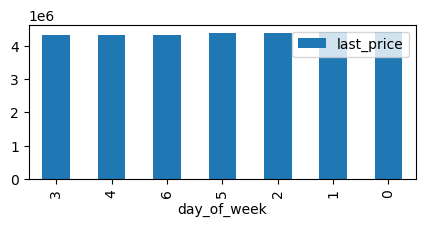

In [221]:
#построим график зависимости цены от дня недели
good_df.pivot_table(index='day_of_week', values='last_price', aggfunc='median').sort_values(by='last_price').plot(y='last_price',kind='bar', figsize=(5,2));

Немного дороже стоят квартиры, опубликованные в понедельник-вторник, но в целом зависимости от дня недели не отслеживается.

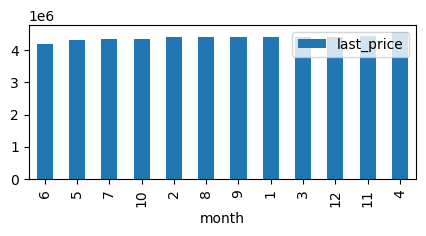

In [223]:
#построим график зависимости цены от месяца размещения
good_df.pivot_table(index='month', values='last_price', aggfunc='median').sort_values(by='last_price').plot(y='last_price',kind='bar', figsize=(5,2));

В летние месяцы (май, июнь, июль) цена на опубликованные квартиры была чуть ниже, чем на квартиры, опубликованные в ноябре-декабре. Самая высокая цена у квартир, опубликованных в апреле. Но данные разницы совсем незначительные.

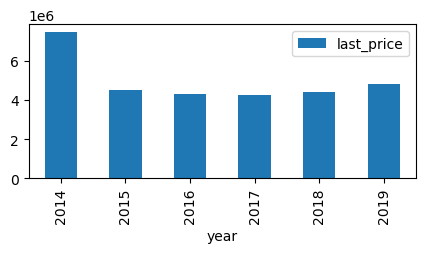

In [225]:
#построим график зависимости цены от года размещения
good_df.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price',kind='bar', figsize=(5,2));

In [226]:
good_df.pivot_table(index='year', values='last_price', aggfunc='median').sort_values(by='last_price')

,last_price
year,
2017,4275000
2016,4299000
2018,4399000
2015,4500000
2019,4800000
2014,7500000


2014 год был последним годом высоких цен на недвижимость для изучаемой выборки. После кризиса в 2014-м, связанным с ростом курса доллара и падением спроса, медианная цена на объекты недвижимости в 2015 упала практически на 40%. Стагнацию удалось преодолеть только к 2019 году - цена понемногу начала расти и увеличилась по сравнению с 2015 годом на 6%.

*Вывод:*

Исходя из построенных графиков и рассчитанных коэффициентов корреляции можно сделать вывод, что цена имеет очень маленькую зависимость от даты публикации объявления.

##### Вывод

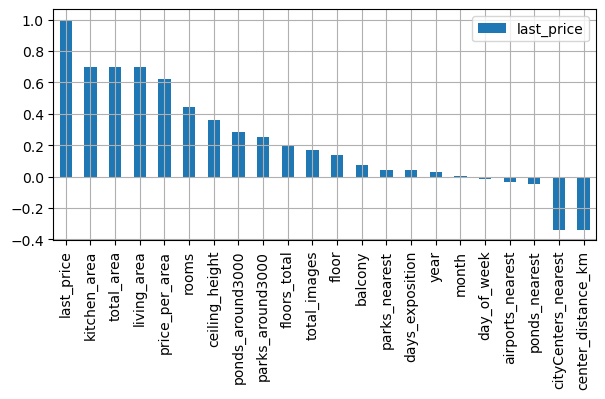

In [230]:
#построим столбчатую диаграмму по матрице корреляции по колонке last_price:
numeric_df = good_df.select_dtypes(include=[np.number])
numeric_df.corr()[['last_price']].sort_values(by='last_price', ascending=False).plot(kind='bar', grid=True, figsize=(7,3));

Итак, на основе полученной матрицы можно выявить следующие зависимости:
- самая высокая зависимость цены наблюдается от общей площади объекта: чем больше площадь, тем выше цена
- соответственно, наблюдается зависимость цены также от жилой площади и площади кухни, но уже в меньшей степени
- также цена зависит от высоты потолков и количества комнат, чем выше потолки и больше комнат, тем цена выше
- наблюдается небольшая зависимость цены от наличия рядом с квартиров парков и прудов, квартиры рядом с прудами и парками стоят дороже
- в отрицательную сторону на цену влияет расстояние от квартиры до центра: чем дальше от центра-тем дешевле квартира.

#### Расчёт средней цены одного квадратного метра в 10 населенных пунктах  с наибольшим числом объявлений

In [233]:
#сохраним 10 населённых пунктов с наибольшим числом объявлений в переменную locality_name_top10:
locality_name_top10 = good_df['locality_name_new'].value_counts().head(10).to_frame()
locality_name_top10

,count
locality_name_new,
санкт-петербург,12652
поселок мурино,518
поселок шушары,414
всеволожск,362
колпино,321
поселок парголово,311
пушкин,307
гатчина,278
деревня кудрово,265


In [234]:
#делаем выборку из датафрейма по этим 10 населенным пунктам:
good_df_top10 = good_df.query('locality_name_new in @locality_name_top10.index')

In [235]:
#создаем сводную таблицу
good_df_top10.pivot_table(index='locality_name_new', values='price_per_area', aggfunc=('count', 'median')).sort_values(by='median', ascending=False)


,count,median
locality_name_new,,
санкт-петербург,12652,102134.00
пушкин,307,98471.00
деревня кудрово,265,92000.00
поселок парголово,311,91428.00
поселок мурино,518,86249.50
поселок шушары,414,76625.00
колпино,321,74468.00
гатчина,278,67745.50
всеволожск,362,65594.00


##### *Вывод* 
Из населенных пунктов с наибольшим количеством объявлений самая высокая стоимость квадратного метра - в Санкт-Петербурге (102 тыс.руб.), самая никзая - в Выборге (58 тыс.руб. за 1 кв.м.)

#### Расчёт средней цены в Санкт-Петербурге в зависимости от расстояния до центра города

Ранее мы посчитали расстояние до центра в километрах.
Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

Сначала сгруппируем значения расстояния до центра города в км, выделим пять групп:
- от 0 до 5 км
- от 5 до 10 км 
- от 10 до 15 км
- от 15 до 25 км
- больше 25 км

In [240]:
#напишем функцию, которая будет возвращать категорию расстояния до центра:
def spb_km_from_center(row):
    try:
        if 0<row['center_distance_km']<=5:
            return 'от 0 до 5 км'
        elif 5<row['center_distance_km']<=10:
            return 'от 5 до 10 км'
        elif 10<row['center_distance_km']<=15:
            return 'от 10 до 15 км'
        elif 15<row['center_distance_km']<=25:
            return 'от 15 до 25 км'
        elif row['center_distance_km']>25:
            return 'больше 25 км'
    except:
        return 'не определено'

In [241]:
#применим её к датафрейму:
good_df['from_center'] = good_df.apply(spb_km_from_center, axis=1)

In [242]:
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_per_area,day_of_week,month,year,floor_type,center_distance_km,from_center
1,7,3350000,40.40,2018-12-04,1,2.65,11,23.31,1,False,False,False,7.07,2,посёлок Шушары,12817.00,18603.00,0,NaN,0,NaN,81.00,поселок шушары,82920,1,12,2018,первый,19.00,от 15 до 25 км
4,2,10000000,100.00,2018-06-19,2,3.03,14,57.69,13,False,False,False,17.50,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,санкт-петербург,100000,1,6,2018,другой,8.00,от 5 до 10 км
5,10,2890000,30.40,2018-09-10,1,2.65,12,17.54,5,False,False,False,5.32,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00,поселок янино-1,95065,0,9,2018,другой,NaN,None
6,6,3700000,37.30,2017-11-02,1,2.65,26,21.52,6,False,False,False,6.53,1,посёлок Парголово,52996.00,19143.00,0,NaN,0,NaN,155.00,поселок парголово,99195,3,11,2017,другой,19.00,от 15 до 25 км
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.31,22,False,False,False,12.53,2,Санкт-Петербург,23982.00,11634.00,0,NaN,0,NaN,NaN,санкт-петербург,110544,3,4,2019,другой,12.00,от 10 до 15 км


In [243]:
#создадим датафрейм с данными только по городу Санкт-Петербург:
df_spb = good_df.query('locality_name_new == "санкт-петербург"')

In [244]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_per_area,day_of_week,month,year,floor_type,center_distance_km,from_center
4,2,10000000,100.00,2018-06-19,2,3.03,14,57.69,13,False,False,False,17.50,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,санкт-петербург,100000,1,6,2018,другой,8.00,от 5 до 10 км
7,5,7915000,71.60,2019-04-18,2,2.65,24,41.31,22,False,False,False,12.53,2,Санкт-Петербург,23982.00,11634.00,0,NaN,0,NaN,NaN,санкт-петербург,110544,3,4,2019,другой,12.00,от 10 до 15 км
9,18,5400000,61.00,2017-02-26,3,2.50,9,35.19,7,False,False,False,10.67,2,Санкт-Петербург,50898.00,15008.00,0,NaN,0,NaN,289.00,санкт-петербург,88524,6,2,2017,другой,15.00,от 10 до 15 км
10,5,5050000,39.60,2017-11-16,1,2.67,12,22.85,3,False,False,False,6.93,0,Санкт-Петербург,38357.00,13878.00,1,310.00,2,553.00,137.00,санкт-петербург,127525,3,11,2017,другой,14.00,от 10 до 15 км
15,16,4650000,39.00,2017-11-18,1,2.65,14,22.50,5,False,False,False,6.82,1,Санкт-Петербург,12900.00,14259.00,1,590.00,1,296.00,19.00,санкт-петербург,119230,5,11,2017,другой,14.00,от 10 до 15 км


In [245]:
#сгруппируем данные по расстоянию от центра и вычислим среднюю цену для каждой группы:
df_spb.groupby('from_center')['price_per_area'].mean().sort_values(ascending=False).to_frame()

,price_per_area
from_center,
от 0 до 5 км,116988.90
от 5 до 10 км,113087.38
от 10 до 15 км,104756.37
от 15 до 25 км,97160.82
больше 25 км,85609.63


Исходя из полученных данных видим, что самая высокая цена - в самом центре города, составляет 117 тыс.руб. за кв.м., что логично. Далее цена начинает снижатся и доходит до 86 тыс.руб за кв. м. на окраинах города.

Рассмотрим зависимость средней цены за кв.м. от расстояния до центра города:

In [248]:
#вычисляем средние значения стоимости квадратного метра по каждому км от центра города и сохраняем их в переменную df_spb_median_km:
df_spb_median_km = df_spb.pivot_table(index='center_distance_km', values='price_per_area', aggfunc='mean')

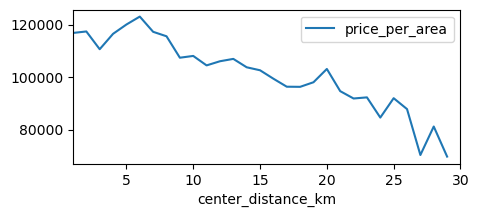

In [249]:
#стороим график средней цены по каждому км:
df_spb_median_km.plot(xlim=(1,30), figsize=(5,2));

На построенном графике видно, что цена за квадратный метр после высоких значений в районе 0-10 в центре города начинает снижаться. Всё логично - стоимость квадратного метра в центре выше, чем на окраинах. 

Посмотрим более подробно, на какой отметке начинается снижение цены, для этого ограничим область графика по оси x с 5 до 10 км:

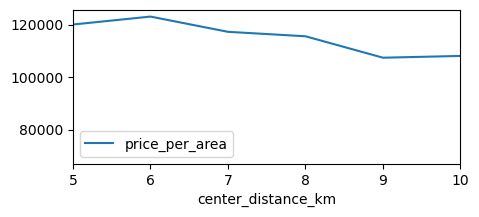

In [251]:
df_spb_median_km.plot(xlim=(5,10), figsize=(5,2));

В соответствии с графиком выше, можно предположить, что центр города Санкт-Петербург находится в пределах 7-8 км, далее цена начинает своё снижение.

На первом графике есть пик цены за квадратный метр в районе 20 км от центра, рассмотрим его более подробно:

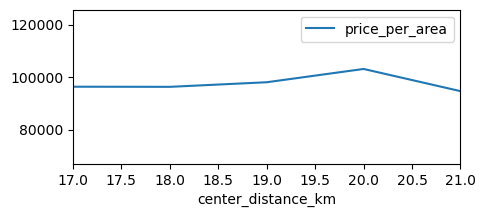

In [254]:
df_spb_median_km.plot(xlim=(17,21), figsize=(5,2));

In [255]:
#создадим переменную в которую запишем объекты, находящиеся на расстоянии 20 км от центра:
df_spb_20km = df_spb.query('center_distance_km == 20.0')
df_spb_20km.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_per_area,day_of_week,month,year,floor_type,center_distance_km,from_center
397,15,5990000,54.00,2018-03-22,2,2.65,36,31.15,28,False,False,False,9.45,1,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,11.00,санкт-петербург,110925,3,3,2018,другой,20.00,от 15 до 25 км
533,15,5900000,67.40,2019-01-11,3,2.50,9,38.88,8,False,False,False,11.79,0,Санкт-Петербург,47531.00,20410.00,0,NaN,0,NaN,95.00,санкт-петербург,87537,4,1,2019,другой,20.00,от 15 до 25 км
871,14,7777777,75.00,2017-11-16,2,2.65,35,43.27,23,False,False,False,13.12,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,169.00,санкт-петербург,103703,3,11,2017,другой,20.00,от 15 до 25 км
1060,10,5200000,50.00,2015-11-06,2,2.65,35,28.85,15,False,False,False,8.75,2,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,281.00,санкт-петербург,104000,4,11,2015,другой,20.00,от 15 до 25 км
1697,11,3550000,28.00,2018-02-08,1,2.65,34,16.15,23,False,False,False,4.90,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,410.00,санкт-петербург,126785,3,2,2018,другой,20.00,от 15 до 25 км


Рассмотрев данные, можно заметить, что много объектов находятся в жилых домах с этажностью 35.

In [257]:
#выделим из датафрейма объекты с этажностью 35 этажей в доме:
df_spb_20km_35fl= df_spb_20km.query('floors_total == 35')
df_spb_20km_35fl.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,price_per_area,day_of_week,month,year,floor_type,center_distance_km,from_center
871,14,7777777,75.00,2017-11-16,2,2.65,35,43.27,23,False,False,False,13.12,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,169.00,санкт-петербург,103703,3,11,2017,другой,20.00,от 15 до 25 км
1060,10,5200000,50.00,2015-11-06,2,2.65,35,28.85,15,False,False,False,8.75,2,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,281.00,санкт-петербург,104000,4,11,2015,другой,20.00,от 15 до 25 км
1917,13,10150000,74.00,2017-11-17,2,2.80,35,42.69,30,False,False,False,12.95,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,NaN,санкт-петербург,137162,4,11,2017,другой,20.00,от 15 до 25 км
2966,9,4300000,37.00,2017-08-08,1,2.65,35,21.35,15,False,False,False,6.47,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,50.00,санкт-петербург,116216,1,8,2017,другой,20.00,от 15 до 25 км
5749,20,3590000,25.00,2017-08-30,0,2.80,35,14.42,26,False,False,True,4.38,2,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,198.00,санкт-петербург,143600,2,8,2017,другой,20.00,от 15 до 25 км


Проведя исследование на сайте Яндекс.недвижимость, были найдены квартиры в ЖК Князь Александр Невский, он как раз находится на расстоянии 20 км от центра города и имеет этажность в размере 35 этажей. Это высотный дом комфорт-класса, стоимость квадратного метра в нём выше, чем в домах рядом с ним, этим объясняется скачок цены за квадратный метр на графике в районе 20 км от центра.

##### *Вывод* 

Исходя из полученных графиков, можно сделать вывод, что цена за квадратный метр начинает снижатся на отметке 7-8 км от центра города, квартиры в центре - дороже, чем дальше от центра - дешевле. Средняя цена за кв.м. в центре - 117 тыс.руб., на окраине - 86 тыс. руб. Есть скачок цены в районе 20 км, там находятся объекты в ЖК комфорт-класса, цена за квадратный метр в которых выше, чем в домах рядом с ним.

### Общий вывод

Было проведено исследование объявлений о продаже квартир сервиса Яндекс.Недвижимость в Санкт-Петербурге и соседних населённых пунктах. 
Изучен датафрейм, содержащий 23699 строк и 22 колонки.

*Произведена предобработка данных:*

1) обработаны пропуски:
* в колонке 'is_apartment' пропуски заменены на False,
* в колонках 'ponds_around3000', 'parks_around3000', 'balcony' отсутствующие значения заменены на 0,
* в колонках 'living_area' и 'kitchen_area' пропуски заполнены произведением общей площади квартиры ('total_area') и коэффициентом отношения жилой площади (или площади кухни) к общей площади квартиры.
* пропуски в столбце 'ceiling_height' заполнены медианным значением высоты потолков.
* удалены строки с пропущенными значениями в колонке 'floors_total'.

2) изменены типы данных в столбцах:
* строки last_price, floors_total, balcony, parks_around3000, ponds_around3000 приведены к типу int(целочисленные)
* колонка first_day_exposition приведена к формату datetime, округлена до дня.

3) обработаны неявные дубликаты в столбце 'locality_name', добавлен новый столбец 'locality_name_new', в котором:
* все строки переведены в нижний регистр
* заменены буквы "ё" на "е"
* заменены названия "городской поселок", "поселок городского типа", "поселок станции" на "поселок"
* устранены неявные дубликаты в названиях следующих населенных пунктов: "Никольское"-"село Никольское", "Кудрово"-"деревня Кудрово", "Мурино"-"поселок Мурино".

В результате количество уникальных значений по названию населенных пунктов сократилось с 364 до 321.

4) обработаны редкие и выбивающиеся значения:
* колонка с ценой на момент снятия с публикации ('last_price') отфильтрована в пределах значений от 0 до 12 млн. руб.
* общая площадь квартиры в кв.м. ('total_area') отфильтрована в границах от 20 до 130 кв.м.
* количество комнат ('rooms') оставлены в пределах от 0 (студии) до 6.
* высота потолков ('ceiling_height') откорректирована следующим образом - убраны значения ниже 2.4 м и выше 3.5 м, оставлены незаполненные строки (так как их удаление приведет к большой потере данных), а также исправлены значения высоты потолков выше 20 м.-они приведены к вещественному формату.
* в колонке с кол-вом дней публикации объявления (от размещения до снятия) ('days_exposition') убраны строки с кол-вом дней ниже 500, оставлены незаполненные строки, чтобы избежать большой потери данных.

Таким образом, объем датафрейма сократился на 15,7% по сравнению с изначальным (с 23699 до 19955 строк).

*В датафрейм были добавлены 6 новых колонок:*

* price_per_area цена одного квадратного метра
* day_of_week день недели публикации объявления
* month месяц публикации объявления
* year год публикации объявления
* floor_type тип этажа квартиры (первый, последний, другой)
* center_distance_km расстояние до центра города в километрах

*Проведён исследовательский анализ получившейся выборки:*

Был изучен каждый столбец в отдельности, основные показатели большей части объектов следующие:
* общая площадь ('total_area') основной части объектов находится в пределах от 39 до 63 кв.м.
* жилая площадь ('living_area') от 22 до 36 кв.м.
* у большей части объектов площадь кухни ('kitchen_area') - от 7 до 11 кв.м.
* цена продажи ('last_price') основной части объектов находится в районе 3,3-5,9 млн. руб.
* число комнат - от 1 до 3.
* высота потолков - от 2.6 до 2.65 м.
* основная часть квартир находится со 2 по 8 этаж.
* 12,6% квартир в выборке находится на первом этаже, 13,8% на последнем. Остальные 73,5% квартир находятся на других этажах.
* этажность основной части домов в выборке находится в диапазоне от 5 до 16 этажей.
* расстояние до центра города Санкт-Петербург - от 11 до 17 км от центра города. Отсутствуют данные о расстоянии до центра у 25% выборки. Было предположено, что для объектов, находящихся в области (деревнях, поселках, городах Выборг, Гатчина и др.) данные автоматически не добавляются.
* расстояние до аэропорта у большей части выборки - от 18 до 38 км. Отсутствуют данные о расстоянии до аэропорта у 25% выборки, скорее всего данные также отсутствуют у объектов в области (как в случае с данными о расстоянии до центра города).
* данные о расстоянии до парка присутствуют только у 31% объекта выборки. В них основная часть объектов имеет расстояние до парка в диапазоне от 291 до 612 метров. Скорее всего картографические данные по паркам добавляются только в тех случаях, когда ближайший парк находится на расстоянии 3 км и меньше.
* чаще всего объявления публикуются в рабочие дни - с понедельника по пятницу, в субботу и воскресенье публикуется почти в два раза меньше объявлений по сравнению с буднями. Наблюдается некоторая сезонность в публикации объявлений - кол-во опубликованных объявлений снижается в летний период (с мая по август), также рынок падает в декабре-январе. Самые активные месяцы - февраль, март, апрель и ноябрь.

Основная часть объектов продавалась в диапазоне от 40 до 177 дней. Медиана составляет 80 дней, продажа квартиры менее чем за 3 месяца является хорошим показателем.
Максимально быстрая продажа - 1 день, самая долгая - 499 дней (1 год и 4 месяца).


*Изучено, от каких факторов больше всего зависит цена:*

* самая высокая зависимость цены наблюдается от общей площади объекта: чем больше площадь, тем выше цена
* соответственно, наблюдается зависимость цены также от жилой площади и площади кухни, но уже в меньшей степени
* в меньшей степени цена зависит от высоты потолков и количества комнат, чем выше потолки и больше комнат, тем цена выше
* наблюдается небольшая зависимость цены от наличия рядом с квартиров парков и прудов, квартиры рядом с прудами и парками стоят дороже
* в отрицательную сторону на цену влияет расстояние от квартиры до центра: чем дальше от центра-тем дешевле квартира.

*Расчитана средняя цена квадратного метра в 10 населенных пунктах с наибольшим числом объявлений:*

Из населенных пунктов с наибольшим количеством объявлений самая высокая стоимость квадратного метра - в Санкт-Петербурге (102 тыс.руб.), самая никзая - в Выборге (58 тыс.руб. за 1 кв.м.)

*Расчитана средняя цена в Санкт-Петербурге в зависимости от расстояния до центра города:*

Средняя цена за кв.м. в центре - 117 тыс.руб., на окраине - 86 тыс. руб. Есть скачок цены в районе 20 км, там находятся объекты в ЖК комфорт-класса, цена за квадратный метр в которых выше, чем в домах рядом с ним. Исходя из полученных графиков, можно сделать вывод, что цена за квадратный метр начинает снижатся на отметке 7-8 км от центра города, квартиры в центре - дороже, чем дальше от центра - дешевле. 

Также дадим рекомендацию разработчикам - чтобы в будущем не возникало проблем с неявными дубликатами, сделать строку с выбором местонахождения типизированной по классификатору адресов РФ, чтобы пользователи не могли сами внести название, какое им вздумается, а выбирали из выпадающего списка.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод